In [14]:
import os


train_covid_dir = r"C:\Users\Jyotishman Parasar\Covid-19_Analysis_CNN\data\train\COVID-19"
train_normal_dir = r"C:\Users\Jyotishman Parasar\Covid-19_Analysis_CNN\data\train\NORMAL"

validation_covid_dir = r"C:\Users\Jyotishman Parasar\Covid-19_Analysis_CNN\data\validation\COVID-19"
validation_covid_dir = r"C:\Users\Jyotishman Parasar\Covid-19_Analysis_CNN\data\validation\NORMAL"

In [16]:
import tensorflow as tf

In [17]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [18]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        r'C:\Users\Jyotishman Parasar\Covid-19_Analysis_CNN\data\train',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        r'C:\Users\Jyotishman Parasar\Covid-19_Analysis_CNN\data\validation',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 2905 images belonging to 2 classes.
Found 273 images belonging to 2 classes.


In [21]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=50,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 8 steps, validate for 8 steps
Epoch 1/50
8/8 [==============================] - 399s 50s/step - loss: 0.3836 - accuracy: 0.8164 - val_loss: 1.0859 - val_accuracy: 0.5664
Epoch 2/50
8/8 [==============================] - 138s 17s/step - loss: 0.2490 - accuracy: 0.9289 - val_loss: 1.0007 - val_accuracy: 0.5664
Epoch 3/50
8/8 [==============================] - 162s 20s/step - loss: 0.2395 - accuracy: 0.9297 - val_loss: 0.9243 - val_accuracy: 0.5664
Epoch 4/50
8/8 [==============================] - 195s 24s/step - loss: 0.2448 - accuracy: 0.9249 - val_loss: 1.0799 - val_accuracy: 0.5664
Epoch 5/50
8/8 [==============================] - 148s 19s/step - loss: 0.2498 - accuracy: 0.9199 - val_loss: 0.7713 - val_accuracy: 0.5664
Epoch 6/50
8/8 [==============================] - 135s 17s/step - loss: 0.2576 - accuracy: 0.9111 - val_loss: 0.7960 - val_accuracy: 0.5664
Epoch 7/50
8/8 [==============================] - 135s 17s/step - loss

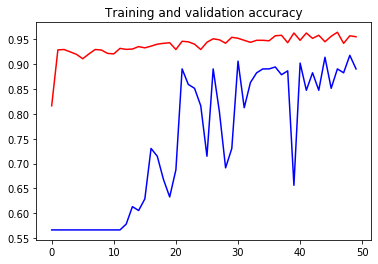

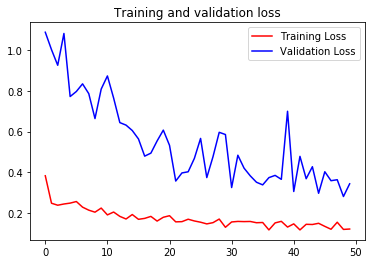

In [23]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [27]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a covid")
    
  else:
    print(fn + " is a normal")

ModuleNotFoundError: No module named 'google.colab'